### Student Information
Name:葉軒瑋

Student ID: 110062540

GitHub ID:aaa9471

Kaggle name:jackson_yeh

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# part 1

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
# Answer here
pd.Series(' '.join(train_df.text).split()).value_counts()[:30]



the     1585
to      1273
a       1145
I       1042
and      912
of       778
is       757
in       588
you      567
my       453
for      431
that     419
on       362
it       359
be       340
me       304
have     290
so       279
this     275
with     272
not      263
at       249
but      242
I'm      238
just     238
was      219
like     216
are      213
your     209
all      198
dtype: int64

In [8]:
pd.Series(' '.join(test_df.text).split()).value_counts()[:30]


the     138
to      135
I       118
a       103
and      89
of       80
is       72
in       65
you      59
for      53
my       48
it       45
on       42
that     39
be       37
was      32
with     29
have     28
at       27
get      25
your     24
so       24
all      24
are      24
just     23
me       22
will     22
like     22
i        22
but      21
dtype: int64

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [10]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [11]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

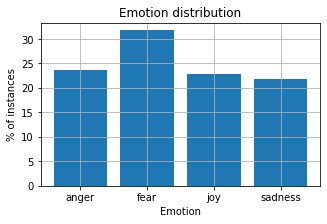

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [15]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [16]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [17]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [18]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [20]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

C:\Users\user\anaconda3\envs\vvv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [21]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [22]:
!pip install nltk

In [23]:
import nltk
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\user\anaconda3\envs\vvv\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [24]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country']

In [26]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [27]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

tfidf.fit(train_df['text'])

feature_names = tfidf.get_feature_names()
feature_names[100:110]

['change',
 'cheer',
 'cheerful',
 'cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country']

In [28]:
"😂" in feature_names

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [30]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'joy', 'anger', 'joy', 'fear', 'joy', 'sadness',
       'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [31]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [32]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [33]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [38]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

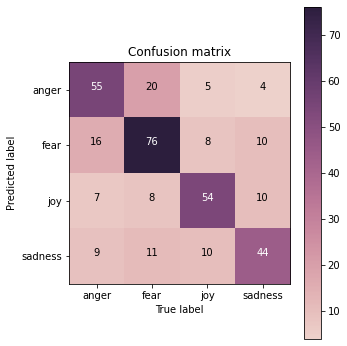

In [39]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
Obviously, the result is overfitting because the training result is very good but the test result is instead.
The final picture show that we can predict correctly most of time, and we can find out which labels are confuse our machine easill

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [40]:
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'anger', 'fear', 'fear', 'fear', 'anger', 'joy',
       'fear', 'fear'], dtype='<U7')

In [41]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.7


In [42]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [43]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [44]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

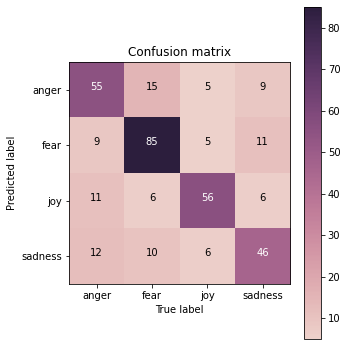

In [45]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
The Naive Bayes model is better than another. Although its training accuracy is worse than another, its test accuracy is better. The Naive Bayes model is better in f1-score too.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [46]:
from tensorflow import keras 

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [47]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3172    sadness
3040    sadness
3517    sadness
1249       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [48]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [50]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 5s 9ms/step - loss: 1.3123 - accuracy: 0.3811 - val_loss: 1.2551 - val_accuracy: 0.4640
Epoch 2/25
113/113 [==============================] - 1s 5ms/step - loss: 0.9559 - accuracy: 0.6521 - val_loss: 0.9108 - val_accuracy: 0.6686
Epoch 3/25
113/113 [==============================] - 1s 5ms/step - loss: 0.5740 - accuracy: 0.7963 - val_loss: 0.7812 - val_accuracy: 0.7089
Epoch 4/25
113/113 [==============================] - 1s 5ms/step - loss: 0.4152 - accuracy: 0.8395 - val_loss: 0.7822 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8766 - val_loss: 0.8357 - val_accuracy: 0.6859
Epoch 6/25
113/113 [==============================] - 1s 4ms/step - loss: 0.2713 - accuracy: 0.9073 - val_loss: 0.8515 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 1s 4ms/step - loss: 0.2279 - accuracy: 0.9272 - val_loss: 0.8965 - val_accuracy: 0.6859
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [51]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[6.0860907e-07, 3.3097109e-07, 9.9995351e-01, 4.5579589e-05],
       [7.8801532e-10, 3.1236912e-08, 9.9878234e-01, 1.2176486e-03],
       [1.2124481e-01, 3.0582480e-02, 2.9748955e-01, 5.5068314e-01],
       [2.1839760e-07, 9.9956506e-01, 5.6170727e-08, 4.3464446e-04],
       [5.1281786e-01, 2.5355348e-01, 1.4480062e-01, 8.8828027e-02]],
      dtype=float32)

In [52]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'sadness', 'fear', 'anger'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.381124,1.312321,0.463977,1.255136
1,1,0.652090,0.955892,0.668588,0.910818
2,2,0.796291,0.574000,0.708934,0.781167
3,3,0.839469,0.415228,0.706052,0.782200
4,4,0.876557,0.334000,0.685879,0.835712
5,5,0.907279,0.271257,0.691643,0.851474
6,6,0.927207,0.227896,0.685879,0.896487
7,7,0.941046,0.187668,0.691643,0.976906
8,8,0.954332,0.155329,0.691643,1.051029
9,9,0.960421,0.138284,0.688761,1.113744


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

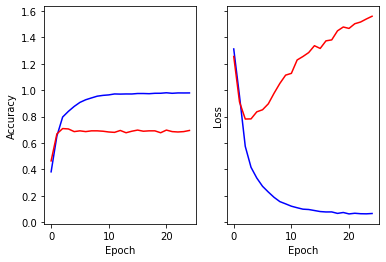

In [60]:
# Answer here
f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(training_log['epoch'],training_log['accuracy'],color='blue')
ax1.plot(training_log['epoch'],training_log['val_accuracy'],color='red')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax2.plot(training_log['epoch'],training_log['loss'],color='blue')
ax2.plot(training_log['epoch'],training_log['val_loss'],color='red')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')

plt.show()

Obviously, it is overfit. the model is good at training set but poor at validation set. 

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [63]:
!pip3 install gensim

  Using cached gensim-4.1.2-cp38-cp38-win_amd64.whl (24.0 MB)
  Using cached Cython-0.29.23-cp38-cp38-win_amd64.whl (1.7 MB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.26
    Uninstalling Cython-0.29.26:
      Successfully uninstalled Cython-0.29.26


### 7.1 Prepare training corpus

In [64]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3172,40345,Im kind of confused. The one thing i do right...,"[Im, kind, of, confused, ., The, one, thing, i..."
3040,40213,I wonder what would happen if I were a father....,"[I, wonder, what, would, happen, if, I, were, ..."
3517,40690,@makai_kishi_ Her eyes stayed glued to the mon...,"[@, makai_kishi_, Her, eyes, stayed, glued, to..."
1249,20392,When my 4yo is gone I blast gothcore music. Sh...,"[When, my, 4yo, is, gone, I, blast, gothcore, ..."
531,10531,Paul forever. Paul should have won! Paul playe...,"[Paul, forever, ., Paul, should, have, won, !,..."


In [65]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Im', 'kind', 'of', 'confused', '.', 'The', 'one', 'thing', 'i', 'do', 'right', 'now', 'has', 'a', 'great', 'future', ',', 'but', 'on', 'the', 'other', 'hand', 'so', 'does', 'the', 'new', 'thing', '.', '#', 'needhelp']),
       list(['I', 'wonder', 'what', 'would', 'happen', 'if', 'I', 'were', 'a', 'father', '.', '#', 'weary']),
       list(['@', 'makai_kishi_', 'Her', 'eyes', 'stayed', 'glued', 'to', 'the', 'monitor', ',', 'not', 'turning', 'away', 'for', 'anything'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [66]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3172,40345,Im kind of confused. The one thing i do right...,"[Im, kind, of, confused, ., The, one, thing, i..."
3040,40213,I wonder what would happen if I were a father....,"[I, wonder, what, would, happen, if, I, were, ..."
3517,40690,@makai_kishi_ Her eyes stayed glued to the mon...,"[@, makai_kishi_, Her, eyes, stayed, glued, to..."
1249,20392,When my 4yo is gone I blast gothcore music. Sh...,"[When, my, 4yo, is, gone, I, blast, gothcore, ..."
531,10531,Paul forever. Paul should have won! Paul playe...,"[Paul, forever, ., Paul, should, have, won, !,..."


In [67]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [68]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.84742373,  0.44697565, -0.1829838 , -0.02356605,  0.13429809,
       -1.2837704 ,  0.08357092,  1.422237  , -0.49264202, -0.24797975,
       -0.65766746, -0.6441507 , -0.31047323,  0.03755169, -0.09555705,
       -0.34329942,  0.09376024, -0.31731686,  0.65130925, -0.84294546,
        0.32835096,  0.6529729 ,  0.75403726, -0.2533539 ,  0.24068569,
       -0.11929299,  0.12433934,  0.6376294 , -0.59826815,  0.27843744,
        0.6342807 , -0.32833773,  0.39913687, -0.8668227 , -0.37286577,
        0.34376264, -0.2587166 , -0.21430382, -0.19223368, -0.43784863,
        0.31661198,  0.02520891, -0.05473905,  0.6933606 ,  0.96336466,
       -0.15026426, -0.6501665 , -0.19190714,  0.5223494 ,  0.34992   ,
       -0.17177412, -0.27397797, -0.25842288,  0.08878174, -0.56359226,
       -0.33797833,  0.04392673, -0.06884766, -0.29441115,  0.14215155,
        0.13641696, -0.09715936, -0.05577608,  0.16137451, -0.34119934,
        0.7108384 ,  0.7170152 ,  0.3806995 , -1.6213263 ,  0.35

In [69]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('See', 0.9232342839241028),
 ('Be', 0.9212568998336792),
 ('smile', 0.9210729002952576),
 ('birthday', 0.9190670847892761),
 ('right', 0.9174973368644714),
 ('blessing', 0.9137982726097107),
 ("'you", 0.9135348200798035),
 ('help', 0.9124181270599365),
 ('blessed', 0.9081891179084778),
 ('depress', 0.9078040719032288)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [70]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "./GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [71]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [72]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [73]:
# Answer here
word2vec_model.wv[training_corpus[0]]

array([[ 0.11683205,  0.29575214,  0.09792458, ..., -0.17196307,
         0.18764077, -0.0728706 ],
       [ 0.1323571 ,  0.35957652,  0.08792136, ..., -0.39939037,
         0.11268804, -0.14817514],
       [ 0.02626031,  1.1900266 , -0.29648528, ..., -1.2096583 ,
         0.2657083 , -1.3684824 ],
       ...,
       [ 0.22472548,  0.62455684,  0.55519503, ..., -0.7213811 ,
         0.6686044 ,  0.051084  ],
       [ 0.19837703, -0.03672261,  1.2235596 , ..., -0.8976644 ,
         1.90395   ,  1.4502223 ],
       [ 0.02357206,  0.01033695,  0.02661289, ..., -0.0280924 ,
         0.00246542,  0.0210252 ]], dtype=float32)

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [74]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [75]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [76]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [77]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [78]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

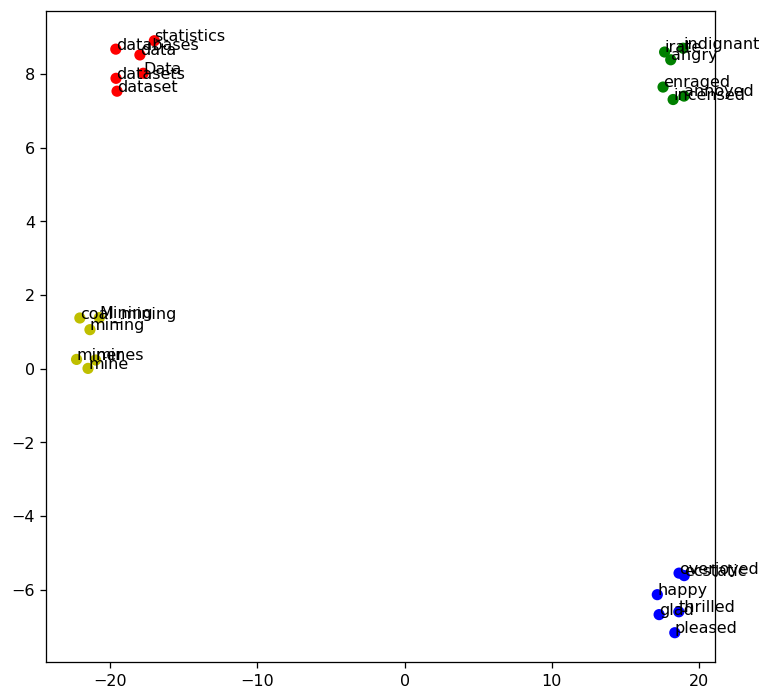

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [80]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

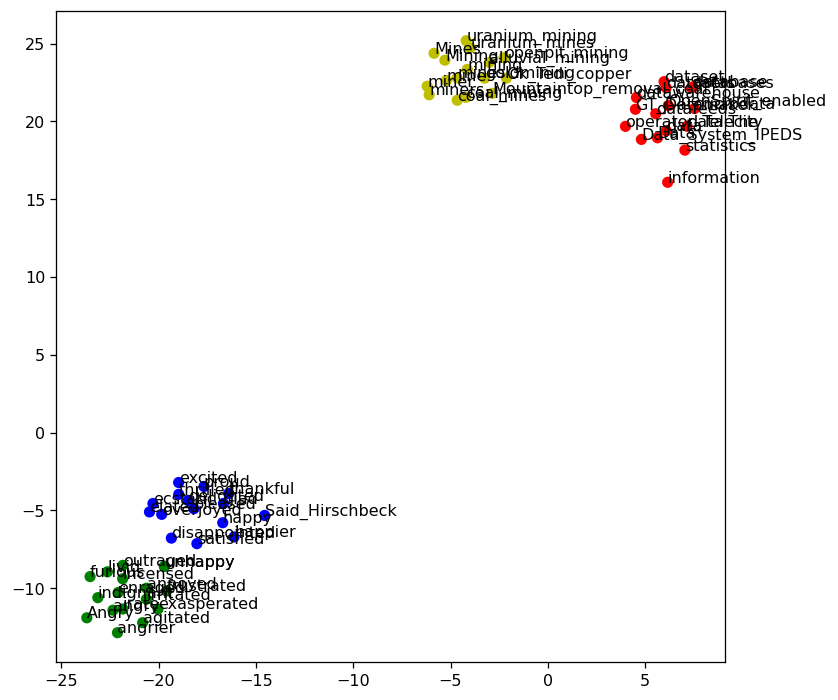

In [81]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# part 2

In [1]:
# import os
# # os.environ["CUDA_VISIBLE_DEVICES"] = "2" 
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# import warnings
# warnings.filterwarnings("ignore")

import tensorflow as tf
import unicodedata
import re
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split



In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [4]:
import pandas as pd
import json

score_list = []
text_list = []
id_list = []
hashtags_list = []
date_list = []
with open("tweets_DM.json","r")as f :
    info_list = f.readlines()
    for data_json in info_list:
        data = json.loads(data_json)
#         score_list.append(data['_score'])
        text_list.append(''.join(data['_source']['tweet']['text']))
        id_list.append(data['_source']['tweet']['tweet_id'])
#         hashtags_list.append(data['_source']['tweet']['hashtags'])
#         date_list.append(data['_crawldate'])


In [5]:
data_tweet = {"tweet_id":id_list,"text":text_list}
data_tweet = pd.DataFrame(data_tweet)

In [6]:

df = pd.read_csv("data_identification.csv",sep=",")
df = pd.merge(df, data_tweet)
df

,tweet_id,identification,text
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...
1,0x29e452,train,Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...
...,...,...,...
1867530,0x227e25,train,@BBCBreaking Such an inspirational talented pe...
1867531,0x293813,train,And still #libtards won't get off the guy's ba...
1867532,0x1e1a7e,train,When you sow #seeds of service or hospitality ...
1867533,0x2156a5,train,@lorettalrose Will you be displaying some <LH>...


In [7]:
df_test = df[df['identification']=='test']
df_train = df[df['identification']=='train']
df_label = pd.read_csv("emotion.csv",sep=",")

In [8]:
df_train = pd.merge(df_train, df_label)
df_train

,tweet_id,identification,text,emotion
0,0x29e452,train,Huge Respect🖒 @JohnnyVegasReal talking about l...,joy
1,0x2b3819,train,Yoooo we hit all our monthly goals with the ne...,joy
2,0x2a2acc,train,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,trust
3,0x2a8830,train,Come join @ambushman27 on #PUBG while he striv...,joy
4,0x20b21d,train,@fanshixieen2014 Blessings!My #strength little...,anticipation
...,...,...,...,...
1455558,0x227e25,train,@BBCBreaking Such an inspirational talented pe...,disgust
1455559,0x293813,train,And still #libtards won't get off the guy's ba...,sadness
1455560,0x1e1a7e,train,When you sow #seeds of service or hospitality ...,joy
1455561,0x2156a5,train,@lorettalrose Will you be displaying some <LH>...,trust


In [9]:
df_label.groupby(['emotion']).count()

,tweet_id
emotion,
anger,39867
anticipation,248935
disgust,139101
fear,63999
joy,516017
sadness,193437
surprise,48729
trust,205478


In [10]:
# shuffle dataset
df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

In [11]:
print("Shape of Training df: ", df_train.shape)
print("Shape of Testing df: ", df_test.shape)

Shape of Training df:  (1455563, 4)
Shape of Testing df:  (411972, 3)


In [12]:
from sklearn.preprocessing import LabelEncoder
def label_encode(le, labels):
    enc = le.transform(labels)
    return tf.keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

In [13]:
# replace the positive with 1, replace the negative with 0
y = df_train['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y[0:4])
print('\ny_train.shape: ', y.shape)
y = label_encode(label_encoder, y)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 554582     disgust
1035980        joy
1384065       fear
64845        trust
Name: emotion, dtype: object

y_train.shape:  (1455563,)


we load all dataset what we need.

# preprocess
this part is method 1, use seq2seq model with attention. but the result is tragedy

In [14]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [16]:
df_test

,tweet_id,identification,text
159364,0x246dcf,test,"Does using ""just"" in email make you sound less..."
233130,0x1f8151,test,When one of your exes is a new hire at your wo...
1311720,0x31c2fc,test,Just came off a LIVE BROADCAST on WEALTH CREAT...
428024,0x2bead5,test,@NerdyWonka Probably the children of all the b...
424428,0x29d045,test,Am I on something or were there actually cloud...
...,...,...,...
1233327,0x2c89e1,test,Feels like I should have been further but my f...
776233,0x359ea7,test,@andybevanitv Wow. Just wow. We can do this. <LH>
1222789,0x2952f5,test,The car in front of me at On The Grind just pa...
1704139,0x21bec9,test,I don't understand why people still try to giv...


In [17]:
X = []
sentences = list(df_train['text'])
for sen in sentences:
    X.append(preprocess_text(sen))


In [18]:
test = []
sentences = list(df_test['text'])
for sen in sentences:
    test.append(preprocess_text(sen))


In [19]:
# Split the training dataset and test dataset
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.20, random_state=42)
print("# training data: {:d}\n# test data: {:d}".format(len(X_train), len(X_vali)))

# training data: 1164450
# test data: 291113


In [20]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_vali = tokenizer.texts_to_sequences(X_vali)
max_len = 100
# padding sentences to the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=max_len)
X_vali = tf.keras.preprocessing.sequence.pad_sequences(X_vali, padding='post', maxlen=max_len)


In [21]:
test = tokenizer.texts_to_sequences(test)
test =  tf.keras.preprocessing.sequence.pad_sequences(test, padding='post', maxlen=max_len)

In [23]:
BATCH_SIZE = 16
embedding_dim = 128
units = 256
# only reserve 10000 words
vocab_size = 10000

In [24]:
BUFFER_SIZE = len(X_train)
steps_per_epoch = len(X_train)//BATCH_SIZE


In [25]:


dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

vali_dataset = tf.data.Dataset.from_tensor_slices((X_vali, y_vali))
vali_dataset = vali_dataset.batch(BATCH_SIZE, drop_remainder=False)

example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([16, 100]), TensorShape([16, 8]))

In [26]:

test_dataset = tf.data.Dataset.from_tensor_slices(test)
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=False)

tokenize the raw data and seperate the training set to train and validation set.

## Encoder

In [27]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        # vacab_size=10000, embedding_dim=256 enc_units=1024 batch_sz=64
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_activation='Softmax',
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        # x is the training data with shape == (batch_size，max_length)  -> (128, 100)
        # which means there are batch_size sentences in one batch, the length of each sentence is max_length
        # hidden state shape == (batch_size, units) -> (128, 1024)
        # after embedding, x shape == (batch_size, max_length, embedding_dim) -> (128, 100, 256)
        x = self.embedding(x)
        
        # output contains the state(in GRU, the hidden state and the output are same) from all timestamps,
        # output shape == (batch_size, max_length, units) -> (128, 100, 1024)
        # state is the hidden state of the last timestamp, shape == (batch_size, units) -> (128, 1024)
        output, state = self.gru(x, initial_state=hidden)
        
        return output, state

    def initialize_hidden_state(self):
        # initialize the first state of the gru,  shape == (batch_size, units) -> (128, 1024)
        return tf.zeros((self.batch_sz, self.enc_units))

In [28]:
encoder = Encoder(vocab_size, embedding_dim, units, BATCH_SIZE)
sample_hidden = encoder.initialize_hidden_state()


In [29]:

# sample input
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))
# the output and the hidden state of GRU is equal
print(sample_output[-1, -1, :] == sample_hidden[-1, :])

Encoder output shape: (batch size, sequence length, units) (16, 100, 256)
Encoder Hidden state shape: (batch size, units) (16, 256)
tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True

## LuongAttention


In [30]:
class LuongAttention(tf.keras.Model):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        # TODO: Complete the function.

        
    def call(self, query, values):
        # TODO: Implement the Luong attention.
        #query = sample_hidden, values = sample_output
        hidden_with_time_axis = tf.expand_dims(query, 1)
#         score = self.V(tf.matmul(self.attn(query).transpose(1, 0), values.permute(1, 2, 0)))
        score = tf.matmul(hidden_with_time_axis,values,transpose_b=True)

#         score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        attention_weights = tf.reshape(attention_weights, shape=(-1, attention_weights.shape[2], 1))
#         attention_weights = tf.reshape(attention_weights, shape=(BATCH_SIZE, attention_weights.shape[2], 1))

        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

#         St = self.attn(output).transpose(1, 0)
#         St = St.unsqueeze(-1)
#         attn = tf.linalg.matmul(query, values, transpose_a=true)
#         return tf.nn.softmax(attn, axis=None).unsqueeze(1)

## Decoder

In [31]:
class Decoder(tf.keras.Model):
    def __init__(self, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        
        # pass through four fully connected layers, the model will return 
        # the probability of the positivity of the sentence
        self.fc_1 = tf.keras.layers.Dense(2048)
        self.fc_2 = tf.keras.layers.Dense(512)
        self.fc_3 = tf.keras.layers.Dense(64)
        self.fc_4 = tf.keras.layers.Dense(8)

        # used for attention
        self.attention = LuongAttention(self.dec_units)

    def call(self, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        output = self.fc_1(context_vector)
        output = self.fc_2(output)
        output = self.fc_3(output)
        output = self.fc_4(output)

        return output, attention_weights

In [32]:
decoder = Decoder(units, BATCH_SIZE)
sample_decoder_output, _ = decoder(sample_hidden, sample_output)
print('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (16, 8)


## Define the optimizer and the loss function


In [33]:
optimizer = tf.keras.optimizers.Adam()
# loss_object = tf.keras.losses.categorical_crossentropy(from_logits=True)

def loss_function(real, pred):
    loss_ = tf.keras.losses.categorical_crossentropy(real, pred,from_logits=True)
    return tf.reduce_mean(loss_)

In [34]:
checkpoint_dir = './checkpoints/sentiment-analysis'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

## Training

In [35]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        # passing enc_output to the decoder
        predictions, _ = decoder(enc_hidden, enc_output)

        loss = loss_function(targ, predictions)

    # collect all trainable variables
    variables = encoder.trainable_variables + decoder.trainable_variables

    # calculate the gradients for the whole variables
    gradients = tape.gradient(loss, variables)

    # apply the gradients on the variables
    optimizer.apply_gradients(zip(gradients, variables))

    return loss

In [38]:
# set the epochs for training
EPOCHS = 4

for epoch in range(EPOCHS):
    start = time.time()

    # get the initial hidden state of gru
    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f},time:{}sec'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy(),(time.time() - start)))

    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix=checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 1.1624,time:1.567352533340454sec
Epoch 1 Batch 100 Loss 1.1138,time:12.170740604400635sec
Epoch 1 Batch 200 Loss 2.1737,time:22.81913924217224sec
Epoch 1 Batch 300 Loss 1.2996,time:33.87752842903137sec
Epoch 1 Batch 400 Loss 0.8755,time:44.39189648628235sec
Epoch 1 Batch 500 Loss 1.4679,time:55.10117030143738sec
Epoch 1 Batch 600 Loss 0.8723,time:65.89453434944153sec
Epoch 1 Batch 700 Loss 1.4236,time:76.26335859298706sec
Epoch 1 Batch 800 Loss 1.2752,time:86.61469006538391sec
Epoch 1 Batch 900 Loss 1.1099,time:97.58563280105591sec
Epoch 1 Batch 1000 Loss 1.1736,time:108.80485200881958sec
Epoch 1 Batch 1100 Loss 1.5126,time:119.74131608009338sec
Epoch 1 Batch 1200 Loss 1.0502,time:130.50319170951843sec
Epoch 1 Batch 1300 Loss 1.7299,time:141.2156035900116sec
Epoch 1 Batch 1400 Loss 1.1362,time:151.6715383529663sec
Epoch 1 Batch 1500 Loss 1.6673,time:162.1589000225067sec
Epoch 1 Batch 1600 Loss 0.9458,time:172.35619640350342sec
Epoch 1 Batch 1700 Loss 1.5996,time:18

Epoch 1 Batch 14300 Loss 1.1206,time:1550.9500243663788sec
Epoch 1 Batch 14400 Loss 1.5392,time:1561.6544342041016sec
Epoch 1 Batch 14500 Loss 1.5217,time:1572.3578443527222sec
Epoch 1 Batch 14600 Loss 1.0295,time:1582.8319880962372sec
Epoch 1 Batch 14700 Loss 1.6957,time:1593.3608388900757sec
Epoch 1 Batch 14800 Loss 1.7902,time:1603.802190542221sec
Epoch 1 Batch 14900 Loss 1.8243,time:1614.3185596466064sec
Epoch 1 Batch 15000 Loss 0.9313,time:1624.86647439003sec
Epoch 1 Batch 15100 Loss 1.6730,time:1635.4086787700653sec
Epoch 1 Batch 15200 Loss 1.2081,time:1645.8400275707245sec
Epoch 1 Batch 15300 Loss 0.9806,time:1656.3493943214417sec
Epoch 1 Batch 15400 Loss 1.5011,time:1666.6657176017761sec
Epoch 1 Batch 15500 Loss 1.0329,time:1677.1785254478455sec
Epoch 1 Batch 15600 Loss 1.1493,time:1687.572193622589sec
Epoch 1 Batch 15700 Loss 1.2198,time:1698.0645565986633sec
Epoch 1 Batch 15800 Loss 1.1940,time:1708.5269122123718sec
Epoch 1 Batch 15900 Loss 0.9976,time:1718.912250995636sec
Ep

Epoch 1 Batch 28300 Loss 1.1793,time:2990.729470014572sec
Epoch 1 Batch 28400 Loss 1.7200,time:3000.927271604538sec
Epoch 1 Batch 28500 Loss 1.0699,time:3011.0541486740112sec
Epoch 1 Batch 28600 Loss 1.1972,time:3021.2425360679626sec
Epoch 1 Batch 28700 Loss 1.0817,time:3031.4798412323sec
Epoch 1 Batch 28800 Loss 1.2445,time:3041.8701820373535sec
Epoch 1 Batch 28900 Loss 1.5318,time:3052.1124877929688sec
Epoch 1 Batch 29000 Loss 1.0056,time:3062.335461616516sec
Epoch 1 Batch 29100 Loss 1.4547,time:3072.57546043396sec
Epoch 1 Batch 29200 Loss 0.9412,time:3082.8550510406494sec
Epoch 1 Batch 29300 Loss 1.2599,time:3093.2593936920166sec
Epoch 1 Batch 29400 Loss 1.3362,time:3103.6397314071655sec
Epoch 1 Batch 29500 Loss 1.1242,time:3113.6989970207214sec
Epoch 1 Batch 29600 Loss 1.0785,time:3123.817387342453sec
Epoch 1 Batch 29700 Loss 1.5259,time:3133.924292564392sec
Epoch 1 Batch 29800 Loss 1.4709,time:3144.054583311081sec
Epoch 1 Batch 29900 Loss 1.0763,time:3154.1298520565033sec
Epoch 1 

Epoch 1 Batch 42400 Loss 1.6111,time:4436.948833703995sec
Epoch 1 Batch 42500 Loss 0.8247,time:4447.264156579971sec
Epoch 1 Batch 42600 Loss 1.1048,time:4457.678501844406sec
Epoch 1 Batch 42700 Loss 2.2282,time:4468.361409187317sec
Epoch 1 Batch 42800 Loss 1.0308,time:4478.655166864395sec
Epoch 1 Batch 42900 Loss 1.5491,time:4488.922478675842sec
Epoch 1 Batch 43000 Loss 1.2887,time:4499.259806871414sec
Epoch 1 Batch 43100 Loss 1.1275,time:4509.452101945877sec
Epoch 1 Batch 43200 Loss 1.2894,time:4519.730899572372sec
Epoch 1 Batch 43300 Loss 1.0128,time:4530.133008241653sec
Epoch 1 Batch 43400 Loss 0.8264,time:4540.674382925034sec
Epoch 1 Batch 43500 Loss 0.9426,time:4551.008709669113sec
Epoch 1 Batch 43600 Loss 1.3500,time:4561.234012126923sec
Epoch 1 Batch 43700 Loss 1.5880,time:4571.538623571396sec
Epoch 1 Batch 43800 Loss 1.0960,time:4581.756565570831sec
Epoch 1 Batch 43900 Loss 1.3985,time:4591.974866867065sec
Epoch 1 Batch 44000 Loss 1.1211,time:4602.241178750992sec
Epoch 1 Batch 

Epoch 1 Batch 56600 Loss 1.2317,time:5900.831790924072sec
Epoch 1 Batch 56700 Loss 1.6064,time:5911.328152656555sec
Epoch 1 Batch 56800 Loss 1.2996,time:5921.484440326691sec
Epoch 1 Batch 56900 Loss 1.3441,time:5931.617722272873sec
Epoch 1 Batch 57000 Loss 0.8488,time:5941.857756137848sec
Epoch 1 Batch 57100 Loss 1.2783,time:5952.121656179428sec
Epoch 1 Batch 57200 Loss 0.9350,time:5962.358961105347sec
Epoch 1 Batch 57300 Loss 1.5549,time:5972.531252145767sec
Epoch 1 Batch 57400 Loss 1.1504,time:5982.759556770325sec
Epoch 1 Batch 57500 Loss 1.5639,time:5993.069977760315sec
Epoch 1 Batch 57600 Loss 1.3185,time:6003.381099224091sec
Epoch 1 Batch 57700 Loss 2.0106,time:6013.561365604401sec
Epoch 1 Batch 57800 Loss 1.7476,time:6023.812674283981sec
Epoch 1 Batch 57900 Loss 1.1703,time:6034.406059741974sec
Epoch 1 Batch 58000 Loss 1.7724,time:6044.852539300919sec
Epoch 1 Batch 58100 Loss 1.2070,time:6055.350308895111sec
Epoch 1 Batch 58200 Loss 1.4434,time:6065.687637329102sec
Epoch 1 Batch 

Epoch 1 Batch 70800 Loss 1.4416,time:7363.664556264877sec
Epoch 1 Batch 70900 Loss 1.6147,time:7373.811841964722sec
Epoch 1 Batch 71000 Loss 1.4529,time:7383.998487472534sec
Epoch 1 Batch 71100 Loss 0.8558,time:7394.216017007828sec
Epoch 1 Batch 71200 Loss 0.9874,time:7404.370303869247sec
Epoch 1 Batch 71300 Loss 1.2154,time:7414.543594837189sec
Epoch 1 Batch 71400 Loss 1.1336,time:7424.766896486282sec
Epoch 1 Batch 71500 Loss 1.7041,time:7434.960700273514sec
Epoch 1 Batch 71600 Loss 1.2234,time:7445.12654209137sec
Epoch 1 Batch 71700 Loss 1.3287,time:7455.340841770172sec
Epoch 1 Batch 71800 Loss 1.1901,time:7465.8902180194855sec
Epoch 1 Batch 71900 Loss 0.8642,time:7476.309566497803sec
Epoch 1 Batch 72000 Loss 1.4175,time:7486.537227153778sec
Epoch 1 Batch 72100 Loss 1.2938,time:7496.641484260559sec
Epoch 1 Batch 72200 Loss 1.1887,time:7506.694852113724sec
Epoch 1 Batch 72300 Loss 1.0379,time:7516.814121723175sec
Epoch 1 Batch 72400 Loss 1.0574,time:7527.078433275223sec
Epoch 1 Batch 

Epoch 2 Batch 12200 Loss 0.7793,time:1248.5703060626984sec
Epoch 2 Batch 12300 Loss 1.2175,time:1258.7686023712158sec
Epoch 2 Batch 12400 Loss 1.2618,time:1268.9548962116241sec
Epoch 2 Batch 12500 Loss 1.6037,time:1279.1781985759735sec
Epoch 2 Batch 12600 Loss 0.8081,time:1289.23202085495sec
Epoch 2 Batch 12700 Loss 1.0597,time:1299.4163610935211sec
Epoch 2 Batch 12800 Loss 1.3980,time:1309.7226822376251sec
Epoch 2 Batch 12900 Loss 1.1386,time:1319.8019518852234sec
Epoch 2 Batch 13000 Loss 1.4546,time:1329.9552381038666sec
Epoch 2 Batch 13100 Loss 1.4739,time:1340.010006904602sec
Epoch 2 Batch 13200 Loss 1.0796,time:1350.0408957004547sec
Epoch 2 Batch 13300 Loss 1.0566,time:1360.1912956237793sec
Epoch 2 Batch 13400 Loss 0.9460,time:1370.401594877243sec
Epoch 2 Batch 13500 Loss 1.2085,time:1380.6569049358368sec
Epoch 2 Batch 13600 Loss 1.2644,time:1390.964225769043sec
Epoch 2 Batch 13700 Loss 0.9851,time:1401.3320837020874sec
Epoch 2 Batch 13800 Loss 1.7577,time:1411.5198242664337sec
Ep

Epoch 2 Batch 26200 Loss 1.6682,time:2685.1648514270782sec
Epoch 2 Batch 26300 Loss 0.7645,time:2695.3791522979736sec
Epoch 2 Batch 26400 Loss 1.6833,time:2705.5774490833282sec
Epoch 2 Batch 26500 Loss 1.2922,time:2715.710731267929sec
Epoch 2 Batch 26600 Loss 1.1831,time:2725.9744057655334sec
Epoch 2 Batch 26700 Loss 1.5626,time:2736.3044908046722sec
Epoch 2 Batch 26800 Loss 1.0290,time:2746.5618002414703sec
Epoch 2 Batch 26900 Loss 1.5391,time:2756.8141090869904sec
Epoch 2 Batch 27000 Loss 0.9059,time:2767.138434410095sec
Epoch 2 Batch 27100 Loss 0.6490,time:2777.4192757606506sec
Epoch 2 Batch 27200 Loss 1.2806,time:2787.6571819782257sec
Epoch 2 Batch 27300 Loss 1.2795,time:2798.0125136375427sec
Epoch 2 Batch 27400 Loss 1.1619,time:2808.4948740005493sec
Epoch 2 Batch 27500 Loss 1.0869,time:2818.748183488846sec
Epoch 2 Batch 27600 Loss 1.0586,time:2828.9207470417023sec
Epoch 2 Batch 27700 Loss 0.8568,time:2839.0352435112sec
Epoch 2 Batch 27800 Loss 1.0851,time:2849.2335407733917sec
Epo

Epoch 2 Batch 40300 Loss 1.4876,time:4131.642810583115sec
Epoch 2 Batch 40400 Loss 1.5194,time:4142.243198156357sec
Epoch 2 Batch 40500 Loss 0.9215,time:4152.454498052597sec
Epoch 2 Batch 40600 Loss 1.2829,time:4162.552051067352sec
Epoch 2 Batch 40700 Loss 0.7882,time:4172.613859415054sec
Epoch 2 Batch 40800 Loss 1.6658,time:4182.853165149689sec
Epoch 2 Batch 40900 Loss 1.2100,time:4193.285516023636sec
Epoch 2 Batch 41000 Loss 0.9486,time:4203.4968140125275sec
Epoch 2 Batch 41100 Loss 1.4689,time:4213.752606868744sec
Epoch 2 Batch 41200 Loss 1.2049,time:4223.950966119766sec
Epoch 2 Batch 41300 Loss 1.4233,time:4234.140260696411sec
Epoch 2 Batch 41400 Loss 1.4702,time:4244.455584526062sec
Epoch 2 Batch 41500 Loss 1.3886,time:4254.799913406372sec
Epoch 2 Batch 41600 Loss 1.2412,time:4265.028514146805sec
Epoch 2 Batch 41700 Loss 1.1056,time:4275.402652978897sec
Epoch 2 Batch 41800 Loss 1.3346,time:4285.620954036713sec
Epoch 2 Batch 41900 Loss 1.4090,time:4295.856259584427sec
Epoch 2 Batch

Epoch 2 Batch 54500 Loss 1.4897,time:5590.6511697769165sec
Epoch 2 Batch 54600 Loss 1.4354,time:5600.925483703613sec
Epoch 2 Batch 54700 Loss 1.2312,time:5611.175722360611sec
Epoch 2 Batch 54800 Loss 1.5519,time:5621.375175476074sec
Epoch 2 Batch 54900 Loss 1.1217,time:5631.564470052719sec
Epoch 2 Batch 55000 Loss 1.2109,time:5641.72075676918sec
Epoch 2 Batch 55100 Loss 1.5207,time:5652.297139167786sec
Epoch 2 Batch 55200 Loss 1.2524,time:5662.593337774277sec
Epoch 2 Batch 55300 Loss 1.3238,time:5672.8646504879sec
Epoch 2 Batch 55400 Loss 1.2083,time:5683.02693939209sec
Epoch 2 Batch 55500 Loss 1.4831,time:5693.368267536163sec
Epoch 2 Batch 55600 Loss 2.0696,time:5703.758101463318sec
Epoch 2 Batch 55700 Loss 0.9684,time:5714.154500484467sec
Epoch 2 Batch 55800 Loss 1.4719,time:5724.628862857819sec
Epoch 2 Batch 55900 Loss 1.3608,time:5735.162234544754sec
Epoch 2 Batch 56000 Loss 1.2072,time:5745.582581758499sec
Epoch 2 Batch 56100 Loss 1.3336,time:5756.062347412109sec
Epoch 2 Batch 562

Epoch 2 Batch 68700 Loss 1.3533,time:7047.48924946785sec
Epoch 2 Batch 68800 Loss 1.2698,time:7057.783035039902sec
Epoch 2 Batch 68900 Loss 1.2514,time:7067.932955741882sec
Epoch 2 Batch 69000 Loss 1.3884,time:7078.297629833221sec
Epoch 2 Batch 69100 Loss 1.3048,time:7088.926023244858sec
Epoch 2 Batch 69200 Loss 0.9649,time:7099.229343652725sec
Epoch 2 Batch 69300 Loss 1.8184,time:7109.4836530685425sec
Epoch 2 Batch 69400 Loss 1.3138,time:7119.719070672989sec
Epoch 2 Batch 69500 Loss 1.0693,time:7130.030380964279sec
Epoch 2 Batch 69600 Loss 1.3517,time:7140.444726705551sec
Epoch 2 Batch 69700 Loss 1.2507,time:7150.657027482986sec
Epoch 2 Batch 69800 Loss 1.3774,time:7160.844320774078sec
Epoch 2 Batch 69900 Loss 1.4890,time:7171.026530981064sec
Epoch 2 Batch 70000 Loss 1.2290,time:7181.177547693253sec
Epoch 2 Batch 70100 Loss 1.0764,time:7191.422853708267sec
Epoch 2 Batch 70200 Loss 0.8971,time:7201.645156860352sec
Epoch 2 Batch 70300 Loss 1.0281,time:7211.8260107040405sec
Epoch 2 Batch

Epoch 3 Batch 10100 Loss 1.1132,time:1036.5423531532288sec
Epoch 3 Batch 10200 Loss 1.1885,time:1046.7806594371796sec
Epoch 3 Batch 10300 Loss 1.5021,time:1057.0210342407227sec
Epoch 3 Batch 10400 Loss 1.0150,time:1067.2033126354218sec
Epoch 3 Batch 10500 Loss 1.6466,time:1077.483627796173sec
Epoch 3 Batch 10600 Loss 1.4401,time:1087.5969059467316sec
Epoch 3 Batch 10700 Loss 1.5274,time:1097.7071824073792sec
Epoch 3 Batch 10800 Loss 1.1596,time:1107.961791753769sec
Epoch 3 Batch 10900 Loss 1.3253,time:1118.099425315857sec
Epoch 3 Batch 11000 Loss 1.3566,time:1128.3797407150269sec
Epoch 3 Batch 11100 Loss 0.8018,time:1138.7030658721924sec
Epoch 3 Batch 11200 Loss 1.3335,time:1148.9903824329376sec
Epoch 3 Batch 11300 Loss 1.1725,time:1159.1788129806519sec
Epoch 3 Batch 11400 Loss 0.9374,time:1169.4388489723206sec
Epoch 3 Batch 11500 Loss 1.3097,time:1179.6464104652405sec
Epoch 3 Batch 11600 Loss 1.2834,time:1190.0057437419891sec
Epoch 3 Batch 11700 Loss 1.1522,time:1200.2000398635864sec


Epoch 3 Batch 24100 Loss 1.2104,time:2469.5547654628754sec
Epoch 3 Batch 24200 Loss 1.7197,time:2479.691095352173sec
Epoch 3 Batch 24300 Loss 0.8252,time:2489.824210882187sec
Epoch 3 Batch 24400 Loss 1.3773,time:2499.9784977436066sec
Epoch 3 Batch 24500 Loss 1.2175,time:2510.2408089637756sec
Epoch 3 Batch 24600 Loss 0.8681,time:2520.4581096172333sec
Epoch 3 Batch 24700 Loss 1.7027,time:2530.5899844169617sec
Epoch 3 Batch 24800 Loss 1.3688,time:2540.879753112793sec
Epoch 3 Batch 24900 Loss 0.7831,time:2551.1840739250183sec
Epoch 3 Batch 25000 Loss 1.3040,time:2561.428381204605sec
Epoch 3 Batch 25100 Loss 1.2331,time:2571.794715642929sec
Epoch 3 Batch 25200 Loss 1.0352,time:2582.174334526062sec
Epoch 3 Batch 25300 Loss 1.5851,time:2592.3570437431335sec
Epoch 3 Batch 25400 Loss 1.3154,time:2602.517332315445sec
Epoch 3 Batch 25500 Loss 1.1897,time:2613.0206978321075sec
Epoch 3 Batch 25600 Loss 1.3615,time:2623.396034002304sec
Epoch 3 Batch 25700 Loss 1.2516,time:2633.8108036518097sec
Epoch

Epoch 3 Batch 38200 Loss 1.0728,time:3918.3282663822174sec
Epoch 3 Batch 38300 Loss 1.4685,time:3928.542567014694sec
Epoch 3 Batch 38400 Loss 1.3726,time:3938.790382862091sec
Epoch 3 Batch 38500 Loss 1.4903,time:3948.9509863853455sec
Epoch 3 Batch 38600 Loss 1.8621,time:3959.0353157520294sec
Epoch 3 Batch 38700 Loss 1.2768,time:3969.318604707718sec
Epoch 3 Batch 38800 Loss 1.8210,time:3979.4798934459686sec
Epoch 3 Batch 38900 Loss 1.4987,time:3989.615175962448sec
Epoch 3 Batch 39000 Loss 1.2265,time:3999.88671541214sec
Epoch 3 Batch 39100 Loss 1.4657,time:4010.1470527648926sec
Epoch 3 Batch 39200 Loss 1.5709,time:4020.2703325748444sec
Epoch 3 Batch 39300 Loss 1.2886,time:4030.4896337985992sec
Epoch 3 Batch 39400 Loss 1.1543,time:4040.665925502777sec
Epoch 3 Batch 39500 Loss 1.1458,time:4051.0064845085144sec
Epoch 3 Batch 39600 Loss 1.1778,time:4061.3244230747223sec
Epoch 3 Batch 39700 Loss 1.4004,time:4071.630744457245sec
Epoch 3 Batch 39800 Loss 1.4410,time:4082.189121723175sec
Epoch 

Epoch 3 Batch 52400 Loss 1.0086,time:5373.657726764679sec
Epoch 3 Batch 52500 Loss 1.2159,time:5384.179335594177sec
Epoch 3 Batch 52600 Loss 0.9249,time:5394.429644107819sec
Epoch 3 Batch 52700 Loss 1.4208,time:5404.516915798187sec
Epoch 3 Batch 52800 Loss 1.1589,time:5414.6261920928955sec
Epoch 3 Batch 52900 Loss 1.1603,time:5424.6917181015015sec
Epoch 3 Batch 53000 Loss 1.2456,time:5435.0509078502655sec
Epoch 3 Batch 53100 Loss 1.0326,time:5445.364456176758sec
Epoch 3 Batch 53200 Loss 1.8094,time:5455.644771337509sec
Epoch 3 Batch 53300 Loss 0.8508,time:5466.0191078186035sec
Epoch 3 Batch 53400 Loss 1.0320,time:5476.334940671921sec
Epoch 3 Batch 53500 Loss 1.0542,time:5486.671956777573sec
Epoch 3 Batch 53600 Loss 1.2998,time:5497.151316642761sec
Epoch 3 Batch 53700 Loss 0.8436,time:5507.478642463684sec
Epoch 3 Batch 53800 Loss 1.3535,time:5517.830973625183sec
Epoch 3 Batch 53900 Loss 1.6060,time:5528.157583236694sec
Epoch 3 Batch 54000 Loss 1.3375,time:5538.692459821701sec
Epoch 3 Ba

Epoch 3 Batch 66600 Loss 1.1893,time:6830.832781076431sec
Epoch 3 Batch 66700 Loss 1.4921,time:6840.992116212845sec
Epoch 3 Batch 66800 Loss 1.1762,time:6851.281433582306sec
Epoch 3 Batch 66900 Loss 1.0338,time:6861.549746513367sec
Epoch 3 Batch 67000 Loss 1.9200,time:6871.787558555603sec
Epoch 3 Batch 67100 Loss 1.5388,time:6882.050358772278sec
Epoch 3 Batch 67200 Loss 1.4856,time:6892.515210151672sec
Epoch 3 Batch 67300 Loss 1.3780,time:6902.748514890671sec
Epoch 3 Batch 67400 Loss 1.6296,time:6913.066838979721sec
Epoch 3 Batch 67500 Loss 1.6984,time:6923.268136739731sec
Epoch 3 Batch 67600 Loss 0.9934,time:6933.530592679977sec
Epoch 3 Batch 67700 Loss 1.0480,time:6943.647187232971sec
Epoch 3 Batch 67800 Loss 1.3587,time:6953.76146531105sec
Epoch 3 Batch 67900 Loss 0.8227,time:6963.867741107941sec
Epoch 3 Batch 68000 Loss 1.3715,time:6973.999022722244sec
Epoch 3 Batch 68100 Loss 1.3203,time:6984.098666667938sec
Epoch 3 Batch 68200 Loss 1.2231,time:6994.468792676926sec
Epoch 3 Batch 6

Epoch 4 Batch 8000 Loss 1.0369,time:823.2496032714844sec
Epoch 4 Batch 8100 Loss 1.5975,time:833.3596439361572sec
Epoch 4 Batch 8200 Loss 1.3167,time:843.6239557266235sec
Epoch 4 Batch 8300 Loss 1.2979,time:853.8692631721497sec
Epoch 4 Batch 8400 Loss 0.8945,time:864.3776288032532sec
Epoch 4 Batch 8500 Loss 1.2743,time:874.7549667358398sec
Epoch 4 Batch 8600 Loss 1.0300,time:884.9838423728943sec
Epoch 4 Batch 8700 Loss 1.4692,time:895.2310054302216sec
Epoch 4 Batch 8800 Loss 1.4226,time:905.3462834358215sec
Epoch 4 Batch 8900 Loss 1.5479,time:915.529577255249sec
Epoch 4 Batch 9000 Loss 1.3849,time:925.8168935775757sec
Epoch 4 Batch 9100 Loss 0.7998,time:936.1284573078156sec
Epoch 4 Batch 9200 Loss 1.6569,time:946.660834312439sec
Epoch 4 Batch 9300 Loss 1.5360,time:957.1481957435608sec
Epoch 4 Batch 9400 Loss 0.9904,time:967.3424916267395sec
Epoch 4 Batch 9500 Loss 1.0433,time:977.6398100852966sec
Epoch 4 Batch 9600 Loss 1.2966,time:987.80357837677sec
Epoch 4 Batch 9700 Loss 1.3990,time

Epoch 4 Batch 22100 Loss 1.4929,time:2271.4370622634888sec
Epoch 4 Batch 22200 Loss 1.2246,time:2281.6283571720123sec
Epoch 4 Batch 22300 Loss 1.0100,time:2291.7146286964417sec
Epoch 4 Batch 22400 Loss 1.1996,time:2301.9384422302246sec
Epoch 4 Batch 22500 Loss 1.9257,time:2312.2563881874084sec
Epoch 4 Batch 22600 Loss 1.2364,time:2322.3896906375885sec
Epoch 4 Batch 22700 Loss 1.3561,time:2332.6119928359985sec
Epoch 4 Batch 22800 Loss 1.1809,time:2342.693263053894sec
Epoch 4 Batch 22900 Loss 1.1401,time:2352.8505516052246sec
Epoch 4 Batch 23000 Loss 1.1762,time:2362.993851184845sec
Epoch 4 Batch 23100 Loss 1.9516,time:2373.4057087898254sec
Epoch 4 Batch 23200 Loss 1.1526,time:2383.743037223816sec
Epoch 4 Batch 23300 Loss 1.0817,time:2394.110371828079sec
Epoch 4 Batch 23400 Loss 1.5950,time:2404.369681596756sec
Epoch 4 Batch 23500 Loss 1.2297,time:2414.6748588085175sec
Epoch 4 Batch 23600 Loss 0.9815,time:2425.0712072849274sec
Epoch 4 Batch 23700 Loss 1.1310,time:2435.408535718918sec
Epo

Epoch 4 Batch 36200 Loss 1.2361,time:3717.96542263031sec
Epoch 4 Batch 36300 Loss 1.2875,time:3728.167849779129sec
Epoch 4 Batch 36400 Loss 0.9171,time:3738.53018283844sec
Epoch 4 Batch 36500 Loss 1.3141,time:3748.654462814331sec
Epoch 4 Batch 36600 Loss 1.2553,time:3758.7687401771545sec
Epoch 4 Batch 36700 Loss 1.2460,time:3768.894343852997sec
Epoch 4 Batch 36800 Loss 1.8255,time:3778.9744033813477sec
Epoch 4 Batch 36900 Loss 1.4925,time:3789.120688676834sec
Epoch 4 Batch 37000 Loss 1.4397,time:3799.3289873600006sec
Epoch 4 Batch 37100 Loss 1.1105,time:3809.5152814388275sec
Epoch 4 Batch 37200 Loss 0.9415,time:3819.68013715744sec
Epoch 4 Batch 37300 Loss 1.3307,time:3830.0438120365143sec
Epoch 4 Batch 37400 Loss 1.3997,time:3840.505168199539sec
Epoch 4 Batch 37500 Loss 1.2181,time:3850.6324484348297sec
Epoch 4 Batch 37600 Loss 0.9098,time:3860.7137184143066sec
Epoch 4 Batch 37700 Loss 1.0226,time:3870.90509390831sec
Epoch 4 Batch 37800 Loss 1.4151,time:3881.197747707367sec
Epoch 4 Bat

Epoch 4 Batch 50400 Loss 1.2195,time:5170.564932107925sec
Epoch 4 Batch 50500 Loss 1.5545,time:5180.709216594696sec
Epoch 4 Batch 50600 Loss 1.3277,time:5190.877970457077sec
Epoch 4 Batch 50700 Loss 1.2385,time:5201.036976337433sec
Epoch 4 Batch 50800 Loss 1.2847,time:5211.192263126373sec
Epoch 4 Batch 50900 Loss 1.0386,time:5221.321544408798sec
Epoch 4 Batch 51000 Loss 1.2244,time:5231.660872459412sec
Epoch 4 Batch 51100 Loss 1.0739,time:5241.763639688492sec
Epoch 4 Batch 51200 Loss 1.7261,time:5251.941028356552sec
Epoch 4 Batch 51300 Loss 1.7894,time:5262.072309494019sec
Epoch 4 Batch 51400 Loss 0.7765,time:5272.252602100372sec
Epoch 4 Batch 51500 Loss 1.2217,time:5282.347875833511sec
Epoch 4 Batch 51600 Loss 1.3614,time:5292.5284214019775sec
Epoch 4 Batch 51700 Loss 1.5371,time:5302.638924598694sec
Epoch 4 Batch 51800 Loss 1.4904,time:5312.865227460861sec
Epoch 4 Batch 51900 Loss 0.9629,time:5323.20755648613sec
Epoch 4 Batch 52000 Loss 0.9238,time:5333.609899044037sec
Epoch 4 Batch 

Epoch 4 Batch 64600 Loss 1.3983,time:6619.294127702713sec
Epoch 4 Batch 64700 Loss 1.2608,time:6629.645458459854sec
Epoch 4 Batch 64800 Loss 0.9894,time:6640.012794017792sec
Epoch 4 Batch 64900 Loss 1.1133,time:6650.363123893738sec
Epoch 4 Batch 65000 Loss 1.0852,time:6660.735538482666sec
Epoch 4 Batch 65100 Loss 1.1846,time:6671.13560962677sec
Epoch 4 Batch 65200 Loss 0.9113,time:6681.465936183929sec
Epoch 4 Batch 65300 Loss 1.3426,time:6691.699240922928sec
Epoch 4 Batch 65400 Loss 1.4482,time:6701.869530916214sec
Epoch 4 Batch 65500 Loss 1.0983,time:6711.994402170181sec
Epoch 4 Batch 65600 Loss 1.2144,time:6722.06103014946sec
Epoch 4 Batch 65700 Loss 1.6906,time:6732.271328449249sec
Epoch 4 Batch 65800 Loss 1.1276,time:6742.449620723724sec
Epoch 4 Batch 65900 Loss 1.0921,time:6752.496883392334sec
Epoch 4 Batch 66000 Loss 1.6489,time:6762.5503969192505sec
Epoch 4 Batch 66100 Loss 1.1071,time:6772.6416873931885sec
Epoch 4 Batch 66200 Loss 1.0944,time:6782.676947116852sec
Epoch 4 Batch 

In [39]:
print(tf.train.latest_checkpoint(checkpoint_dir))
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

./checkpoints/sentiment-analysis\ckpt-2


In [40]:
@tf.function
def test_step(inp, enc_hidden):
    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        predictions, attention_weights = decoder(enc_hidden, enc_output)
    return predictions, attention_weights

## evaluate

In [41]:
def evaluate(test_data):
    enc_hidden = encoder.initialize_hidden_state()
    
    for batch, (inp, targ) in enumerate(test_data):
        if len(inp) != BATCH_SIZE:
            enc_hidden = tf.zeros((len(inp), units))
        # make prediction
        if batch == 0:
            predictions, attention_weights = test_step(inp, enc_hidden)
            predictions, attention_weights = predictions.numpy(), attention_weights.numpy()
        else:
            _predictions, _attention_weights = test_step(inp, enc_hidden)
            _predictions, _attention_weights = _predictions.numpy(), _attention_weights.numpy()
            predictions = np.concatenate((predictions, _predictions))
            attention_weights = np.concatenate((attention_weights, _attention_weights))
    
    predictions = np.squeeze(predictions)
    attention_weights = np.squeeze(attention_weights)
    predictions = label_decode(label_encoder, predictions)
#     predictions[np.where(predictions < 0.5)] = 0
#     predictions[np.where(predictions >= 0.5)] = 1
    return predictions, attention_weights

In [42]:
vali_pred, attention_weights = evaluate(vali_dataset)


In [43]:
y_vali = label_decode(label_encoder, y_vali)

In [44]:
print('Accuracy: ', (vali_pred == y_vali).sum() / len(y_vali))


Accuracy:  0.5432323530725183


In [45]:
vali_pred

array(['sadness', 'sadness', 'joy', ..., 'disgust', 'sadness', 'sadness'],
      dtype=object)

## predict test

In [46]:
def evaluate_test(test_data):
    enc_hidden = encoder.initialize_hidden_state()
    
    for batch, (inp) in enumerate(test_data):
        if len(inp) != BATCH_SIZE:
            enc_hidden = tf.zeros((len(inp), units))
        # make prediction
        if batch == 0:
            predictions, attention_weights = test_step(inp, enc_hidden)
            predictions, attention_weights = predictions.numpy(), attention_weights.numpy()
        else:
            _predictions, _attention_weights = test_step(inp, enc_hidden)
            _predictions, _attention_weights = _predictions.numpy(), _attention_weights.numpy()
            predictions = np.concatenate((predictions, _predictions))
            attention_weights = np.concatenate((attention_weights, _attention_weights))
    
    predictions = np.squeeze(predictions)
    attention_weights = np.squeeze(attention_weights)
    predictions = label_decode(label_encoder, predictions)
#     predictions[np.where(predictions < 0.5)] = 0
#     predictions[np.where(predictions >= 0.5)] = 1
    return predictions, attention_weights

In [47]:
test_pred, attention_weights = evaluate_test(test_dataset)

In [53]:
df_ans  = pd.DataFrame(test_pred)
df_test['emotion']  = df_ans

In [49]:
df_test['id'] = df_test['tweet_id']
df_test

,tweet_id,identification,text,emotion,id
159364,0x246dcf,test,"Does using ""just"" in email make you sound less...",joy,0x246dcf
233130,0x1f8151,test,When one of your exes is a new hire at your wo...,anticipation,0x1f8151
1311720,0x31c2fc,test,Just came off a LIVE BROADCAST on WEALTH CREAT...,NaN,0x31c2fc
428024,0x2bead5,test,@NerdyWonka Probably the children of all the b...,NaN,0x2bead5
424428,0x29d045,test,Am I on something or were there actually cloud...,NaN,0x29d045
...,...,...,...,...,...
1233327,0x2c89e1,test,Feels like I should have been further but my f...,NaN,0x2c89e1
776233,0x359ea7,test,@andybevanitv Wow. Just wow. We can do this. <LH>,NaN,0x359ea7
1222789,0x2952f5,test,The car in front of me at On The Grind just pa...,NaN,0x2952f5
1704139,0x21bec9,test,I don't understand why people still try to giv...,NaN,0x21bec9


In [50]:
ddd = df_test[['id','emotion']]

In [51]:
ddd

,id,emotion
159364,0x246dcf,joy
233130,0x1f8151,anticipation
1311720,0x31c2fc,NaN
428024,0x2bead5,NaN
424428,0x29d045,NaN
...,...,...
1233327,0x2c89e1,NaN
776233,0x359ea7,NaN
1222789,0x2952f5,NaN
1704139,0x21bec9,NaN


In [52]:
ddd.to_csv('pred.csv',sep=",",header=True,index=False)

# BERT
the best result is from here

In [14]:

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification


In [15]:
use_gpu = torch.cuda.is_available()
use_gpu

True

In [16]:
print("Shape of Training df: ", df_train.shape)
print("Shape of Testing df: ", df_test.shape)

Shape of Training df:  (1455563, 4)
Shape of Testing df:  (411972, 3)


In [17]:
# replace the positive with 1, replace the negative with 0
y = df_train['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y[0:4])
print('\ny_train.shape: ', y.shape)
y = label_encode(label_encoder, y)
y

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 554582     disgust
1035980        joy
1384065       fear
64845        trust
Name: emotion, dtype: object

y_train.shape:  (1455563,)


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [18]:
label=['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']

In [19]:
from datasets import load_dataset, Dataset

# dataset = load_dataset('text', data_files={'train': train, 'test': test})
dataset = Dataset.from_dict({'text': df_train['text'], 'labels':  y})
dataset_test = Dataset.from_dict({'text': df_test['text']})
dataset[0]

{'text': 'Does anyone in #London actually #work? all I see is another #protest every day? #wtf?',
 'labels': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [20]:
dataset_test[0]

{'text': '@dahvieinsanity music - still the best cure for writers block since they invented Irish coffee &lt;3 <LH>'}

## tokenize

In [21]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

def preprocess_fn(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## seperate dataset

In [49]:
tokenized_dataset = dataset.map(preprocess_fn, batched=True)
tokenized_dataset_test = dataset_test.map(preprocess_fn, batched=True)
train_dataset, eval_dataset = tokenized_dataset.train_test_split(test_size=0.3).values()
train_dataset = train_dataset.shuffle(seed=42)
eval_dataset = eval_dataset.shuffle(seed=42)
# train_dataset = tokenized_dataset.shuffle(seed=42)
# eval_dataset = tokenized## tokenize_dataset.shuffle(seed=42).select(range(100))
test_dataset = tokenized_dataset_test
# train_dataset['input_ids'][0][:10]

  0%|          | 0/1456 [00:00<?, ?ba/s]

  0%|          | 0/412 [00:00<?, ?ba/s]

In [93]:
train_dataset, eval_dataset = tokenized_dataset.train_test_split(test_size=0.3).values()
train_dataset = train_dataset.shuffle(seed=42)
eval_dataset = eval_dataset.shuffle(seed=42)

In [23]:

tokenized_dataset = dataset.map(preprocess_fn, batched=True)
tokenized_dataset_test = dataset_test.map(preprocess_fn, batched=True)
train_dataset, eval_dataset = tokenized_dataset.train_test_split(test_size=0.5).values()

train_dataset = tokenized_dataset.shuffle(seed=42)
eval_dataset = tokenized_dataset.shuffle(seed=42).select(range(100))
test_dataset = tokenized_dataset_test
# train_dataset['input_ids'][0][:10]

  0%|          | 0/1456 [00:00<?, ?ba/s]

  0%|          | 0/412 [00:00<?, ?ba/s]

In [ ]:
tokenized_dataset

In [ ]:
tokenized_dataset_test

In [ ]:
#special tokens
tokenizer("[CLS][SEP][UNK][PAD][MASK]")

## load model

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

model ## load model= AutoModelForSequenceClassification.from_pretrained('vinai/bertweet-base',num_labels = 8)
model

## load checkpoint

In [23]:
import torch
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('./test_trainer/checkpoint-70000')
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

## compute_metrics

In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score 

# metric = load_metric("glue", "mrpc")
# accuracy = load_metric("accuracy")
# f1_score = load_metric("f1")
# precision = load_metric("precision")
# recall = load_metric("recall")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
#     predictions = logits
    predictions = np.argmax(logits, axis=-1)
    labels = np.argmax(labels,axis=-1)
#     return metric.compute(predictions=predictions, references=labels)
    return {
        "accuracy": accuracy_score(y_pred=predictions, y_true=labels),
        "f1": f1_score(y_pred=predictions, y_true=labels, average='macro' ),
        "precision": precision_score(y_pred=predictions, y_true=labels, average='weighted'),
        "recall": recall_score(y_pred=predictions, y_true=labels, average='weighted')
    }

## TrainingArguments

In [50]:
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

training_args = TrainingArguments(
    output_dir="test_trainer",
    per_device_train_batch_size=16,
    num_train_epochs=1,
    evaluation_strategy='steps', # epoch
    eval_steps=5000,
    save_steps=5000,
    logging_steps=5000,
    dataloader_drop_last =False,
    load_best_model_at_end = True,
    metric_for_best_model = 'f1',
    weight_decay = 0.5
)


trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset, compute_metrics=compute_metrics,callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)
training_args

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
bf16=False,
bf16_full_eval=False,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_steps=5000,
evaluation_strategy=IntervalStrategy.STEPS,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=True,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_strategy=HubStrategy.EVERY_SAVE,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
label_names=None,
label_smoothing_factor=0.0,
learning_rate=5e-05,
length_column_name=length,
load_best_model_at_end=True,
local_rank=-1,
log_level=-1,
log_level_replica=-1,
log_on_each_node=True,
logging_dir=test_trainer\runs\Jan

## Training

In [51]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running training *****
  Num examples = 1018894
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 63681


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
5000,0.160400,0.160492,0.730858,0.665050,0.732754,0.730858
10000,0.175000,0.171443,0.708308,0.639632,0.718370,0.708308
15000,0.181100,0.181959,0.689055,0.613497,0.700689,0.689055
20000,0.184900,0.179649,0.689889,0.611178,0.693682,0.689889


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 436669
  Batch size = 8
Saving model checkpoint to test_trainer\checkpoint-5000
Configuration saved in test_trainer\checkpoint-5000\config.json
Model weights saved in test_trainer\checkpoint-5000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 436669
  Batch size = 8
Saving model checkpoint to test_trainer\checkpoint-10000
Configuration saved in test_trainer\checkpoint-10000\config.json
Model weights saved in test_trainer\checkpoint-10000\pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
*****

TrainOutput(global_step=20000, training_loss=0.17536494140625, metrics={'train_runtime': 12849.9916, 'train_samples_per_second': 79.291, 'train_steps_per_second': 4.956, 'total_flos': 2.105001836544e+16, 'train_loss': 0.17536494140625, 'epoch': 0.31})

In [77]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 727782
  Batch size = 8


{'eval_loss': 0.14616753160953522,
 'eval_accuracy': 0.7743843623502642,
 'eval_f1': 0.7249269794314556,
 'eval_precision': 0.7885322978807812,
 'eval_recall': 0.7743843623502642,
 'eval_runtime': 3522.4761,
 'eval_samples_per_second': 206.611,
 'eval_steps_per_second': 25.826,
 'epoch': 0.88}

## predict and output result

In [52]:
logits, tweet_id, metrics = trainer.predict(test_dataset)


The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 411972
  Batch size = 8


In [53]:
predictions = label_decode(label_encoder, logits)

In [54]:
predictions[-10:]

array(['trust', 'joy', 'joy', 'trust', 'trust', 'trust', 'sadness', 'joy',
       'joy', 'sadness'], dtype=object)

In [55]:
ans = df_test.reset_index()

In [56]:
predictions = pd.DataFrame(predictions)
ans['pred'] = predictions
ans1 = ans[['tweet_id','pred']]
ans1 = ans1.rename(columns={
    'tweet_id':'id',
    'pred':'emotion'
})
ans1

,id,emotion
0,0x2a370d,joy
1,0x233082,joy
2,0x326f71,joy
3,0x38c4a1,anticipation
4,0x270864,disgust
...,...,...
411967,0x28336f,trust
411968,0x2d34e6,sadness
411969,0x2d5f67,joy
411970,0x1df874,joy


In [48]:
ans1.to_csv('pre.csv',header = True,index = False)